###### 11월 14일


# 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 시각화를 주피터에 
%matplotlib inline

#한글 폰트를 선명하게 보기위해
%config Inlinebackend.fiure_format = 'retina'
mpl.rc('font',family = 'malgun gothic')
# 유니코드에서 음수로 부호설정
mpl.rc('axes',unicode_minus = False)

# 차트 설정 
sns.set(font = "malgun gothic", rc = {'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize = (10,8))
warnings.filterwarnings('ignore')

# 데이터셋 로딩

In [2]:
# 모기지수 : 일 평균 모기 개체수

In [3]:
mos = pd.read_csv('C:\\k_disital\\source\\mygit\\ML-First-Project\\mosquito_Indicator.csv')

In [4]:
mos

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [5]:
mos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


## 데이터 탐색 EDA

In [6]:
mos.keys()

Index(['date', 'mosquito_Indicator', 'rain(mm)', 'mean_T(℃)', 'min_T(℃)',
       'max_T(℃)'],
      dtype='object')

In [7]:
#mos.columns !! 나중에 보고 삭제

In [8]:
#colums=mos.keys() !! 나중에 보고 필요없으면 삭제

In [9]:
# !!이거 만들필요가 있나??!!
#df = pd.DataFrame(mos , columns=colums)

In [10]:
#df.columns = ['date','mosquito_Indicator','rain','mean_T','min_T','max_T'] !! 나중에 보고 삭제

In [11]:
mos['mosquito_Indicator'].describe()

count    1342.000000
mean      251.991803
std       295.871336
min         0.000000
25%         5.500000
50%        91.900000
75%       480.400000
max      1000.000000
Name: mosquito_Indicator, dtype: float64

### 데이터 시각화

In [12]:
def plot_hist(df):
    # 하나의 도화지에 20개의 그래프 그리기
    plt.rcParams['figure.figsize'] = [20,16]
    fig = plt.figure()
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(3,2,i+1) # 5행5열에서 i+1번째 #ax : 축
        plt.hist(df[df.columns[i]],bins = 50)
        ax.set_title(df.columns[i])
    plt.show()

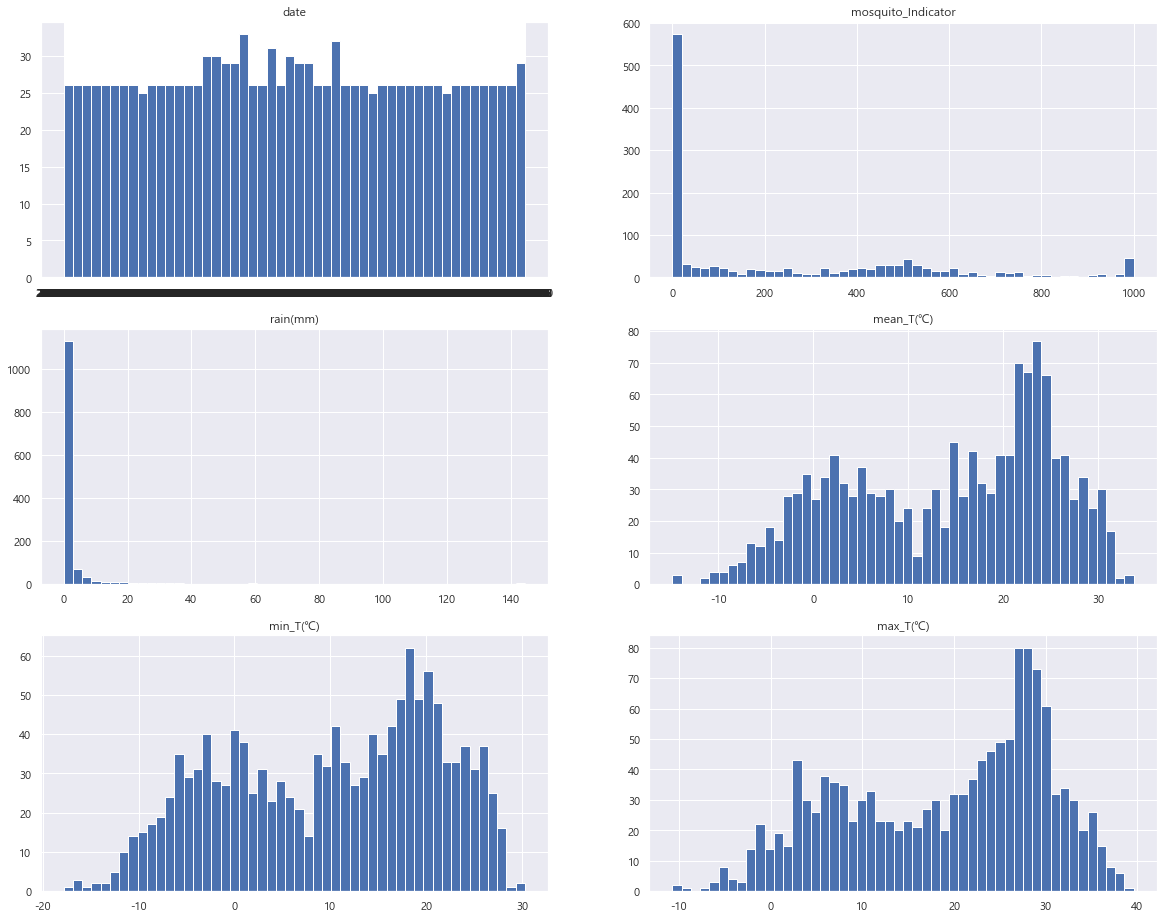

In [13]:
plot_hist(mos)

### 상관계수

In [14]:
mos.corr()

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
mosquito_Indicator,1.000000,0.216325,0.730742,0.746279,0.700929
rain(mm),0.216325,1.000000,0.147173,0.189054,0.100173
mean_T(℃),0.730742,0.147173,1.000000,0.990174,0.989618
min_T(℃),0.746279,0.189054,0.990174,1.000000,0.964941
max_T(℃),0.700929,0.100173,0.989618,0.964941,1.000000


<AxesSubplot:>

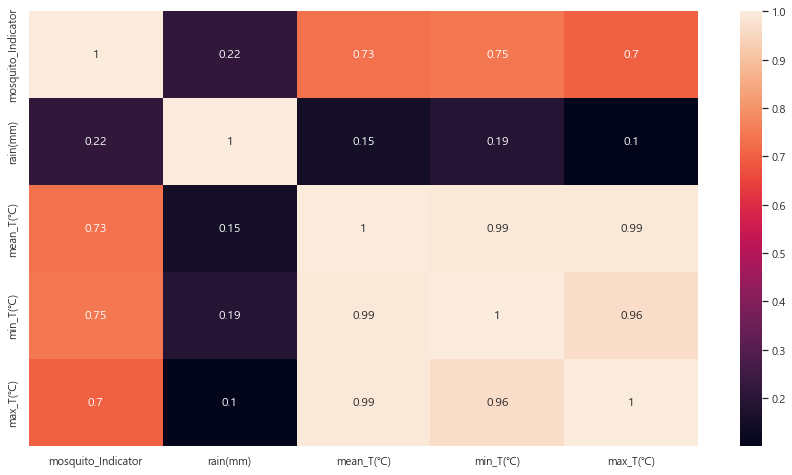

In [15]:
plt.figure(figsize = (15,8))
sns.heatmap(mos.corr(), annot=True)



## 데이터 전처리

### 중복된 데이터 제거

In [16]:
mos.date.is_unique

False

In [17]:
print(mos.date.count())
print(mos.date.nunique())

1342
1295


- https://min23th.tistory.com/45
- https://wikidocs.net/154060

In [18]:
mos.drop_duplicates(subset='date',ignore_index=True,inplace=True) ### 중복된거 지우는거임

#ignore_index=True : 인데스도 같이 수정해줌


In [19]:
mos.date.is_unique  ## True란것은 중복이 없다는 것임

True

In [20]:
print(mos.date.count())
print(mos.date.nunique())

1295
1295


In [21]:
mos

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1290,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1291,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1292,2019-12-29,5.5,1.4,3.8,1.1,6.2
1293,2019-12-30,5.5,0.4,2.7,-5.7,6.8


### 날짜로 데이터타입 변경

In [22]:
mos['date'] = pd.to_datetime(mos['date'])

In [23]:
mos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1295 non-null   datetime64[ns]
 1   mosquito_Indicator  1295 non-null   float64       
 2   rain(mm)            1295 non-null   float64       
 3   mean_T(℃)           1295 non-null   float64       
 4   min_T(℃)            1295 non-null   float64       
 5   max_T(℃)            1295 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 60.8 KB


### 스케일링

In [24]:
data = mos.drop(['mosquito_Indicator', 'date'],axis = 1)
target = mos['mosquito_Indicator']
# !! rain(mm) 넣고 뺴고 해서 값 얼마나 다른지 확인

In [25]:
## rain 뺏을 떄
#MAE: 152.595, MSE:  39182.144, RMSE:  197.945, R2:0.544
# lr.score(X_train,y_train
# 0.5611723963842761

# lr.score(X_test, y_test)
# 0.5442378010778453


##넣었을 떄 
# MAE: 152.494, MSE:  39084.151, RMSE:  197.697, R2:0.545
                
# 0.561818520440136
# 0.5453776460188773    

## 진짜 얼마 차이 안남.. 근데 다중공산성 검사를 해야한...?이아니라 나머지가 온도라서 당연히 높은거

In [26]:
data

,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,0.0,18.8,12.2,26.0
1,16.5,21.1,16.5,28.4
2,27.0,12.9,8.9,17.6
3,0.0,15.7,10.2,20.6
4,7.5,18.9,10.2,26.9
...,...,...,...,...
1290,0.0,-1.7,-4.6,2.6
1291,0.0,1.1,-3.6,6.1
1292,1.4,3.8,1.1,6.2
1293,0.4,2.7,-5.7,6.8


In [27]:
target

0       254.4
1       273.5
2       304.0
3       256.2
4       243.8
        ...  
1290      5.5
1291      5.5
1292      5.5
1293      5.5
1294      5.5
Name: mosquito_Indicator, Length: 1295, dtype: float64

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled = sc.fit_transform(data)

In [29]:
scaled.shape

(1295, 4)

In [30]:
# # '월' 만 분리 !! 나중에 다시 확인
# mos['date_m'] = mos['date'].dt.strftime('%m')
# mos.head()

### train, test 나누기

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size = 0.2, random_state = 1121)

# 회귀분석

## LinearRegression 알고리즘

In [32]:
# train
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)     

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred) # : 에러
# 값이 작을수록 (오차가 작을수록) 좋음
mse = mean_squared_error(y_test, pred) # : 에러
# 값이 작을수록 (오차가 작을수록) 좋음
# 오차의 값을 제곱한 값 => 값이 보통 크게 나옴
rmse = np.sqrt(mse) # 에러
# 값이 작을수록 (오차가 작을수록) 좋음 
r2 = r2_score(y_test, pred) # :설명력
# 1에 가가울수로 좋음

print('MAE: {0:.3f}, MSE: {1: .3f}, RMSE: {2: .3f}, R2:{3:.3f}'.format(mae, mse, rmse, r2))

MAE: 152.494, MSE:  39084.151, RMSE:  197.697, R2:0.545


In [34]:
# r2랑 거의 같은 값 나옴
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

0.561818520440136
0.5453776460188773


In [35]:
# 릿지 alpha : -1
# 0.5617292087395449
# 0.5456175742772317

## 다항회귀

### 사이킷런 변환기_3차

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3 , include_bias = False) # 절편 개수(1을 제거)

#poly.fit(X_train)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x3^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x3^2',
 'x2^3',
 'x2^2 x3',
 'x2 x3^2',
 'x3^3']

In [37]:
lr.fit(train_poly,y_train)
pred = lr.predict(test_poly)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.6412912318596309
-2.158969368778374


In [38]:
print(X_train.shape)
y_train = np.array(y_train).reshape(-1,1) # 2차원으로 차원 변경
print(y_train.shape)

(1036, 4)
(1036, 1)


### 사이킷런 변환기_2차
- train과 test의 점수차를 줄일 수 있을 수도 있어 사이킷런 변환기 사용


In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2, include_bias = False) # 절편 개수(1을 제거)

#poly.fit(X_train)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

### 다중회귀_2차

In [40]:
lr.fit(train_poly,y_train)
pred = lr.predict(test_poly)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.6013579279220858
0.4889815298922211


### 릿지 규제
- 릿지 회귀(Ridge Regression) 모델 : 계수를 제곱한 값을 기준으로 규제 적용

In [41]:
from sklearn.linear_model import Ridge, Lasso
# 훈련세트와 테스트세트의 정수가 가장 가까운 지점이 최적의 alpha 값이 된다
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #릿지모델
    ridge = Ridge(alpha = alpha)
    #릿지모델 훈련
    ridge.fit(X_train, y_train)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test,y_test))

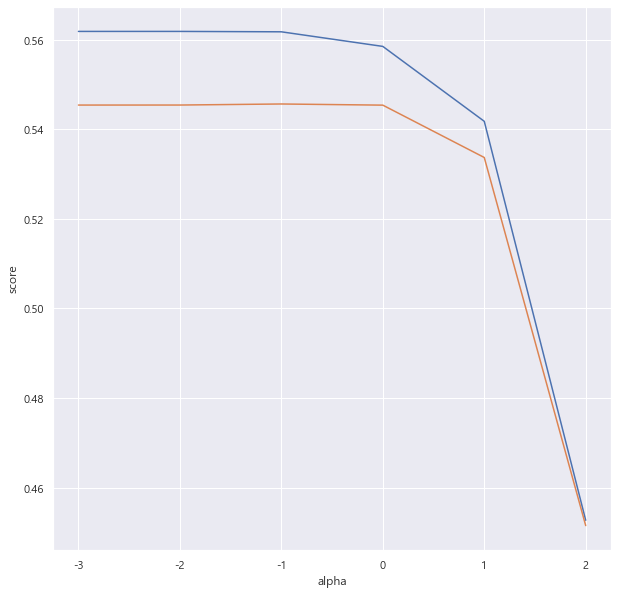

In [42]:
# 시각화
plt.figure(figsize=(10,10))
plt.plot(np.log10(alpha_list), train_score) # 로그로 안 보면 크기가 너무 크다.
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

- 확률일 높은 것 중에 폭이 좁은게 -1(0.1)과 0(1)/ 점수는 낮지만 폭이 좁은건 1(10)

In [43]:
# alpha가 10(1)
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5417508701720717
0.5336737589918069


In [44]:
# alpha가 1
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5584720652391784
0.5453594913007357


In [45]:
# alpha가 -1
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.5617292087395449
0.5456175742772317


- score가 높은 것 중에 폭이 좁은게 -1(0.1)과 0(1)
- 점수는 낮지만 폭이 좁은건 1(10)
- 편차가 있지만 조금이라 확률이 높은걸 선택

### 라쏘규제

In [46]:
lasso = Lasso()

lasso.fit(X_train, y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.555959291121928
0.5419116036324951


In [47]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #라쏘모델
    lasso = Lasso(alpha = alpha)
    #릿지모델 훈련
    lasso.fit(X_train, y_train)
    #결정계수(R2 score)
    train_score.append(lasso.score(X_train,y_train))
    test_score.append(lasso.score(X_test,y_test))

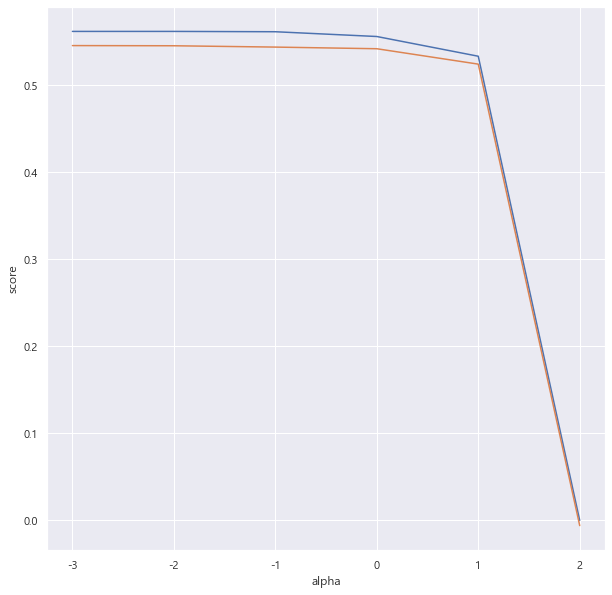

In [48]:
# 시각화
plt.figure(figsize=(10,10))
plt.plot(np.log10(alpha_list), train_score) # 로그로 안 보면 크기가 너무 크다.
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

- 시각화로 봤을 때 -1(0.1), 0(1), 1(10) 넣어보기

In [49]:
# 알파값 10
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.5332946185403951
0.5242197770735639


In [50]:
# 알파값 1
lasso = Lasso(alpha = 1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.555959291121928
0.5419116036324951


In [51]:
# 알파값 0.1
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.5614372438900941
0.5437997463207276


- 릿지가 미세하게 좋은 결과값이 나옴<br> !! 이거 다시얘기해보기

릿지 alpha : -1 <br>
0.5617292087395449<br>
0.5456175742772317<br>
<br>
라쏘 alpha : 0.1<br>
0.5614372438900941<br>
0.5437997463207276<br>

# 시계열 분석

## 전처리 및 시각화

### 모듈 불러오기

In [52]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")


In [53]:
# 넘파이 버전 낮추기
# !pip install numpy==1.20.3

# 터미널 끄고 다시 시작
# 한번에 안되면 두번 해보기


In [54]:
print(np.__version__)

1.20.3


In [55]:
#_centered 이게 미리 설치 되어 있어서 충돌이 일어나 모듈 import가 안되서 함수로 따로 만듬
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [56]:
# 스케일링 후 date, Indi 를 합친 df
## 전처리 완료된 데이터를 가지고 시계열 df 만들기
mos_scaled = pd.DataFrame(scaled, columns=data.columns)
mos_scaled['date'] = mos.date
mos_scaled['Indi'] = target
mos_scaled

,rain(mm),mean_T(℃),min_T(℃),max_T(℃),date,Indi
0,0.000000,0.692784,0.623701,0.729622,2016-05-01,254.4
1,0.114187,0.740206,0.713098,0.777336,2016-05-02,273.5
2,0.186851,0.571134,0.555094,0.562624,2016-05-03,304.0
3,0.000000,0.628866,0.582121,0.622266,2016-05-04,256.2
4,0.051903,0.694845,0.582121,0.747515,2016-05-05,243.8
...,...,...,...,...,...,...
1290,0.000000,0.270103,0.274428,0.264414,2019-12-27,5.5
1291,0.000000,0.327835,0.295218,0.333996,2019-12-28,5.5
1292,0.009689,0.383505,0.392931,0.335984,2019-12-29,5.5
1293,0.002768,0.360825,0.251559,0.347913,2019-12-30,5.5


In [57]:
mos_scaled.date

0      2016-05-01
1      2016-05-02
2      2016-05-03
3      2016-05-04
4      2016-05-05
          ...    
1290   2019-12-27
1291   2019-12-28
1292   2019-12-29
1293   2019-12-30
1294   2019-12-31
Name: date, Length: 1295, dtype: datetime64[ns]

In [58]:
len(mos_scaled.date)

1295

In [59]:
# 일별 
mos_p = mos_scaled[['date', 'Indi']]
mos_p = mos_p.set_index('date')
## 시리즈가 아니라서 예측이 제대로 안된거가 해서 바꿔봤음(승객은 시리즈라서)
## 근데 바꿔도 예측값이 5.5 밖에 안나옴 !! 데이터 프레임이나 시리즈나 상관 없음 , 나중에 삭제하기
#mos_p = mos_p.Indi

In [60]:
# mos_pp = mos_scaled[['date', 'Indi']]
# mos_pp = mos_pp.set_index('date')

In [61]:

type(mos_p)

pandas.core.frame.DataFrame

In [62]:
mos_p.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=1295, freq=None)

## 일

### 예측

In [63]:
# freq= D 로 만들기(시계열 분석할 때 꼭 필요)
mos_p.index= mos_p.index.to_period(freq = 'D')

#### 모기 데이터 시계열 시각화 ( 일)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

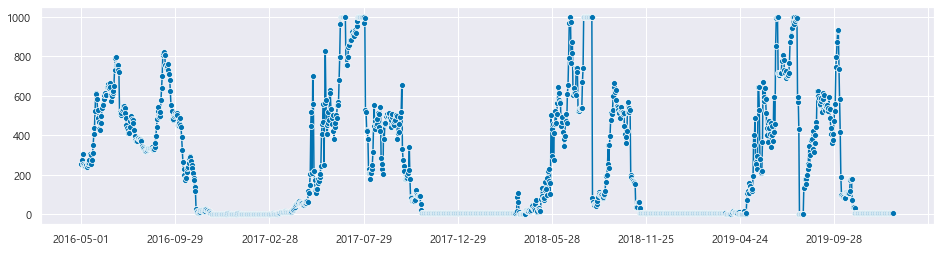

In [64]:
# 시계열 데이터 그래프
# 인덱스가 데이터 타입인 시리즈를 가지고 그레프 그리기
from sktime.utils.plotting import plot_series
plot_series(mos_p)

#### sktime

In [65]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

# step 1: data specification : 데이터 세팅
y = mos_p

# step 2: specifying(:지정하다) forecasting horizon : 기간 설정 ( 2년)
## 방법 1
fh = np.arange(1, 732)

## 방법 2
# fh = ForecastingHorizon(
#     pd.PeriodIndex(pd.date_range("2020-01-01", periods=731, freq="D")), is_relative=False
# )

# step 3: specifying the forecasting algorithm :알고리즘 인스턴트 생성
forecaster = NaiveForecaster(strategy="mean", sp=731)
##ValueError: Unknown strategy: first. Expected one of: ('last', 'mean', 'drift':이동).
# strategy: 'last': 마지막 값으로 예측? 기간 마지막 값으로 예측?'mean': 평균값으로 예측 'drift': 이동값으로 예측?(상향인지 하향인지(트렌드)파악)

# step 4: fitting the forecaster : 학습
forecaster.fit(y, fh=fh)

# step 5: querying predictions : 연습
y_pred = forecaster.predict(fh)

In [66]:
y_pred

,Indi
2020-01-01,5.5
2020-01-02,5.5
2020-01-03,5.5
2020-01-04,5.5
2020-01-05,5.5
...,...
2021-12-27,5.5
2021-12-28,5.5
2021-12-29,5.5
2021-12-30,5.5


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

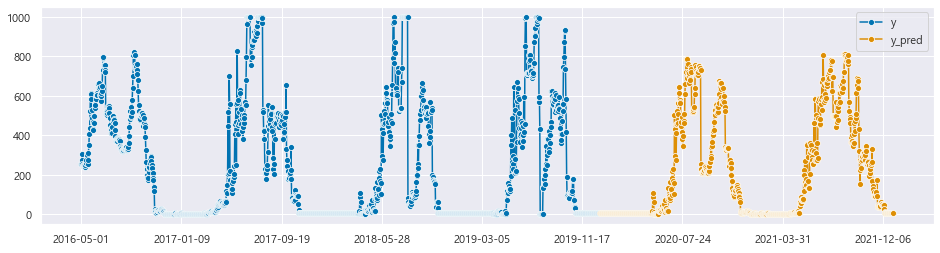

In [67]:
# 시각화
plot_series(y, y_pred, labels=["y", "y_pred"])

#### 데이터 분할

In [68]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=0.25)

In [69]:
# 데이터 학습

#y_test.index 의 인덱스를 가지고 기간 설정하기
fh = ForecastingHorizon(y_test.index, is_relative=False)

# step 3: specifying the forecasting algorithm :알고리즘 인스턴트 생성
forecaster = NaiveForecaster(strategy="mean", sp=731)

# step 4: fitting the forecaster : 학습
forecaster.fit(y_train)

# step 5: querying predictions : 에측
y_pred = forecaster.predict(fh)

In [70]:
y_pred.shape

(324, 1)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

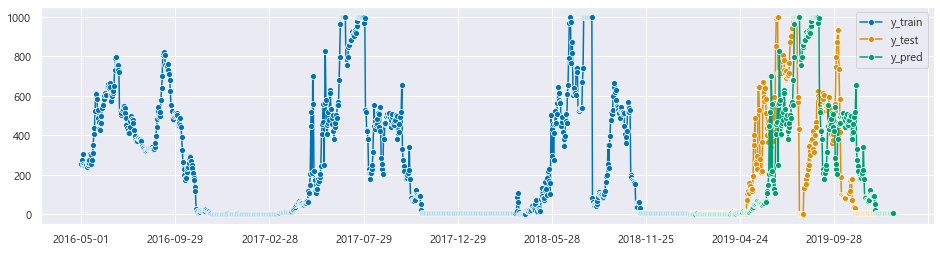

In [71]:
# 시각화
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

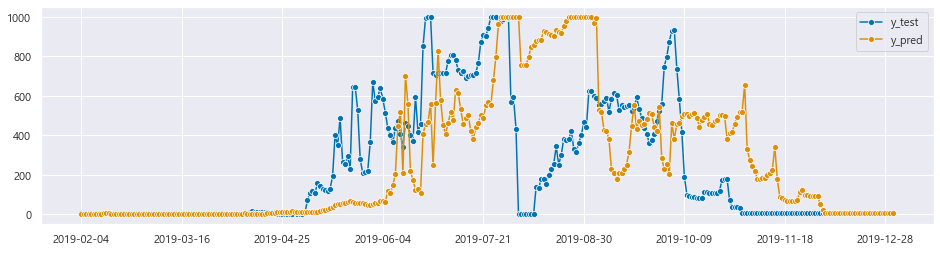

In [72]:
plot_series( y_test, y_pred, labels=[ "y_test", "y_pred"])

#### 평가

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE: {0:.3f}, MSE: {1: .3f}, RMSE: {2: .3f}, R2:{3:.3f}'.format(mae, mse, rmse, r2))

MAE: 202.836, MSE:  93518.104, RMSE:  305.807, R2:-0.016


- MAPE는 퍼센트 값을 가지며 0에 가까울수록 회귀 모형의 성능이 좋다고 해석할 수 있음
- 0~100% 사이의 값을 가져 이해하기 쉬우므로 성능 비교 해석이 가능
- https://acdongpgm.tistory.com/102

In [74]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [75]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
# 기본값은 symmetric=False
#symmetric=False: 평균절대백분율오차

8.135113326897706e+16

In [76]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=True)
# 대칭평균절대백분율오차
#이와 같은 숫자를 적절하게 해석하려면 해당 메트릭의 속성을 이해하고(예: 낮을수록 좋음) 적합한 기준선 및 경쟁자 알고리즘과 비교하는 것이 좋습니다(5단계 참조).
## symmetric: 번역은 대칭인데... 이게 뭘 의미하는지는 아직 잘 모르ㅔㅆ음!!

1.0075897899439359

In [77]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [102]:
# option 2: using the composable class interface
mape = MeanAbsolutePercentageError(symmetric=True)
# the class interface allows to easily construct variants of the MAPE
#  e.g., the non-symmetric verion
# it also allows for inspection of metric properties
#  e.g., are higher values better (answer: no)?
mape.get_tag("lower_is_better")

True

In [103]:
mape(y_test, y_pred)

0.9103210326168167

#### 계절성 분석
- https://otexts.com/fppkr/decomposition.html
- 시계열 패턴 : 추세(trend), 계절성(seasonality), 주기(cycle) 이렇게 세 가지 시계열 패턴
- sktime에서는 주기(cycle)는 사용할 수 없음

In [80]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
#forecaster = ExponentialSmoothing(trend="add", seasonal="add", sp=365)
forecaster = ExponentialSmoothing(seasonal="add", sp=365)

#trend must be one of: 'add', 'mul', 'additive'(첨가물), 'multiplicative'
#seasonal must be one of: 'add', 'mul', 'additive', 'multiplicative'
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [90]:
from sktime.forecasting.ets import AutoETS

In [91]:
forecaster = AutoETS(auto=True, sp=365, n_jobs=-1)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

KeyboardInterrupt: 

!! 다변량 예측은 여러개의 컬럼을 가지고 하나의 타겟을 예측하는게 아니고, 여러가지 컬럼을 동시에 예측하는 건가?

In [ ]:
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
)

In [ ]:
forecaster = MultiplexForecaster(
    forecasters=[
        ("naive", NaiveForecaster(strategy="mean")),
        ("ets", ExponentialSmoothing(trend="add", sp=365)),
    ]
)
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5), window_length=30)
forecaster_param_grid = {"selected_forecaster": ["ets", "naive"]}
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

In [ ]:
gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
from sktime.forecasting.compose import EnsembleForecaster


In [ ]:
ses = ExponentialSmoothing(sp=31)
holt = ExponentialSmoothing(trend="add", damped_trend=False, sp=31)
damped = ExponentialSmoothing(trend="add", damped_trend=False, sp=31)

forecaster = EnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt),
        ("damped", damped),
    ]
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
### water 이거 써보기

In [ ]:
from sktime.forecasting.all import mean_squared_error
from sktime.forecasting.online_learning import (
    NormalHedgeEnsemble,
    OnlineEnsembleForecaster,
)

In [ ]:
hedge_expert = NormalHedgeEnsemble(n_estimators=3, loss_func=mean_squared_error)


In [ ]:
forecaster = OnlineEnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt),
        ("damped", damped),
    ],
    ensemble_algorithm=hedge_expert,
)

forecaster.fit(y=y_train, fh=fh)
y_pred = forecaster.update_predict_single(y_test)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

### 모기 데이터 시계열 시각화 (월)

In [ ]:
에러용

In [ ]:
# 월별
mos_p_m = mos_scaled[['date', 'Indi']]
mos_p_m = mos_p_m.set_index('date')
## 시리즈가 아니라서 예측이 제대로 안된거가 해서 바꿔봤음(승객은 시리즈라서)
## 근데 바꿔도 예측값이 5.5 밖에 안나옴 !!
#mos_p_m = mos_p_m.Indi


In [ ]:
mos_p_m.index= mos_p_m.index.to_period(freq = 'M')

In [ ]:
mos_p_m

In [ ]:
mos_p_m =mos_p_m.groupby([mos_p_m.index])['Indi'].sum()
# 위의 거랑 똑같은 식 : mos_p_m =mos_p_m.groupby([mos_p_m.index]).sum('Indi')

In [ ]:
mos_p_m

In [ ]:
plot_series(mos_p_m)

In [ ]:

# step 1: data specification : 데이터 세팅
y = mos_p_m

# step 2: specifying forecasting horizon : 기간 설정
### 예측 범위(2020 1월 달 => 31일)
fh = np.arange(1, 32)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=31)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred_m = forecaster.predict(fh)

In [ ]:
y_pred_m

In [ ]:
# 시각화
plot_series(y, y_pred_m, labels=["y", "y_pred_m"])

### 예측 알고리즘 지정 

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")

### all estimator

In [ ]:
ㅁㄴㅇㄻㄴㅇㄹ!! 나중에 시간 많을 때 돌려보기

In [ ]:
from sktime.registry import all_estimators

all_estimators(
    "forecaster", as_dataframe=True, return_tags=["scitype:y", "requires-fh-in-fit"]
)

In [ ]:
ㅁㄴㅇㄻㄴㅇㄹ!! 나중에 시간 많을 때 돌려보기

from sktime.registry import all_estimators

all_estimators(
    "forecaster", as_dataframe=True, return_tags=["scitype:y", "requires-fh-in-fit"]
)

## 분류

## 회귀